In [17]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
import torch
from matplotlib import pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [19]:
from common import BrownianMotion, EulerMaruyamaSimulator, plot_trajectories_1d

100%|██████████| 499/499 [00:00<00:00, 50049.21it/s]


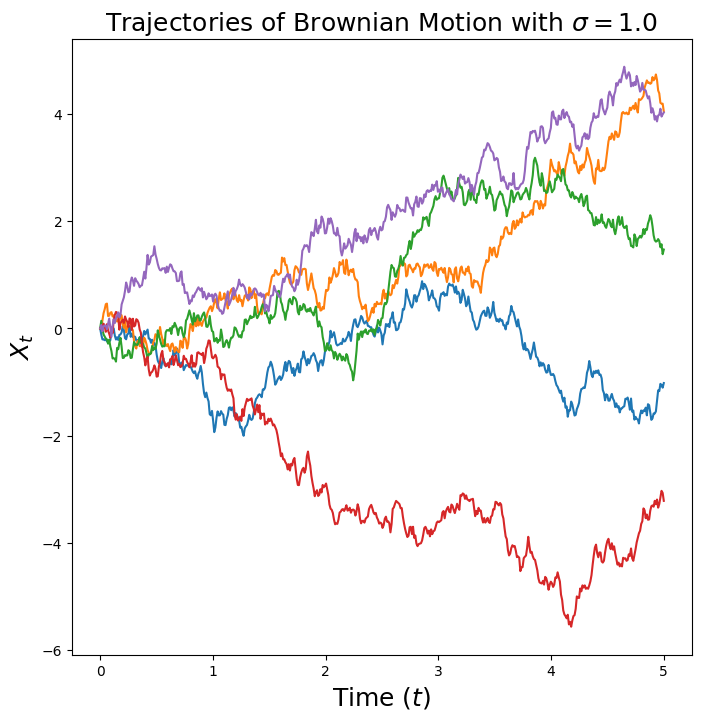

In [20]:
sigma = 1.0
brownian_motion = BrownianMotion(sigma)
simulator = EulerMaruyamaSimulator(sde=brownian_motion)
x0 = torch.zeros(5,1).to(device) # Initial values - let's start at zero
ts = torch.linspace(0.0,5.0,500).to(device) # simulation timesteps

plt.figure(figsize=(8, 8))
ax = plt.gca()
ax.set_title(r'Trajectories of Brownian Motion with $\sigma=$' + str(sigma), fontsize=18)
ax.set_xlabel(r'Time ($t$)', fontsize=18)
ax.set_ylabel(r'$X_t$', fontsize=18)
plot_trajectories_1d(x0, simulator, ts, ax)
plt.show()

In [21]:
from common import (EulerMaruyamaSimulator, OUProcess,
                    plot_scaled_trajectories_1d)

100%|██████████| 999/999 [00:00<00:00, 92541.85it/s]


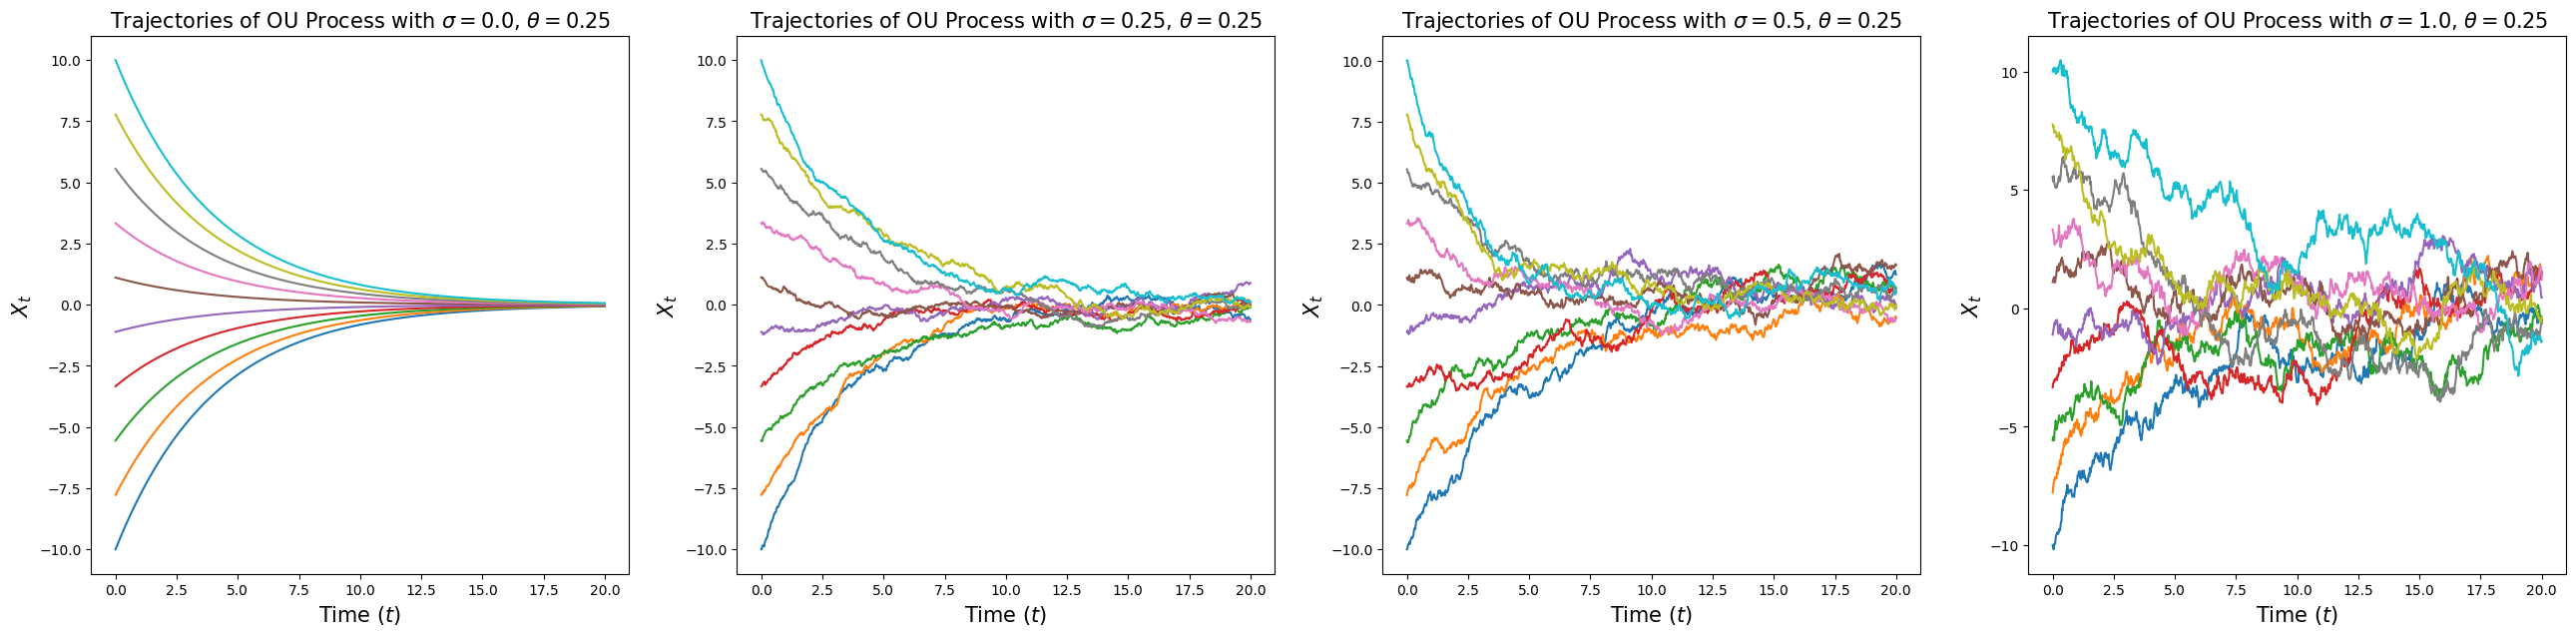

In [22]:
# Try comparing multiple choices side-by-side
thetas_and_sigmas = [
    (0.25, 0.0),
    (0.25, 0.25),
    (0.25, 0.5),
    (0.25, 1.0),
]
simulation_time = 20.0

num_plots = len(thetas_and_sigmas)
fig, axes = plt.subplots(1, num_plots, figsize=(8 * num_plots, 7))

for idx, (theta, sigma) in enumerate(thetas_and_sigmas):
    ou_process = OUProcess(theta, sigma)
    simulator = EulerMaruyamaSimulator(sde=ou_process)
    x0 = torch.linspace(-10.0,10.0,10).view(-1,1).to(device) # Initial values - let's start at zero
    ts = torch.linspace(0.0,simulation_time,1000).to(device) # simulation timesteps

    ax = axes[idx]
    ax.set_title(f'Trajectories of OU Process with $\\sigma = ${sigma}, $\\theta = ${theta}', fontsize=15)
    ax.set_xlabel(r'Time ($t$)', fontsize=15)
    ax.set_ylabel(r'$X_t$', fontsize=15)
    plot_trajectories_1d(x0, simulator, ts, ax)
plt.show()

100%|██████████| 999/999 [00:00<00:00, 92082.23it/s]


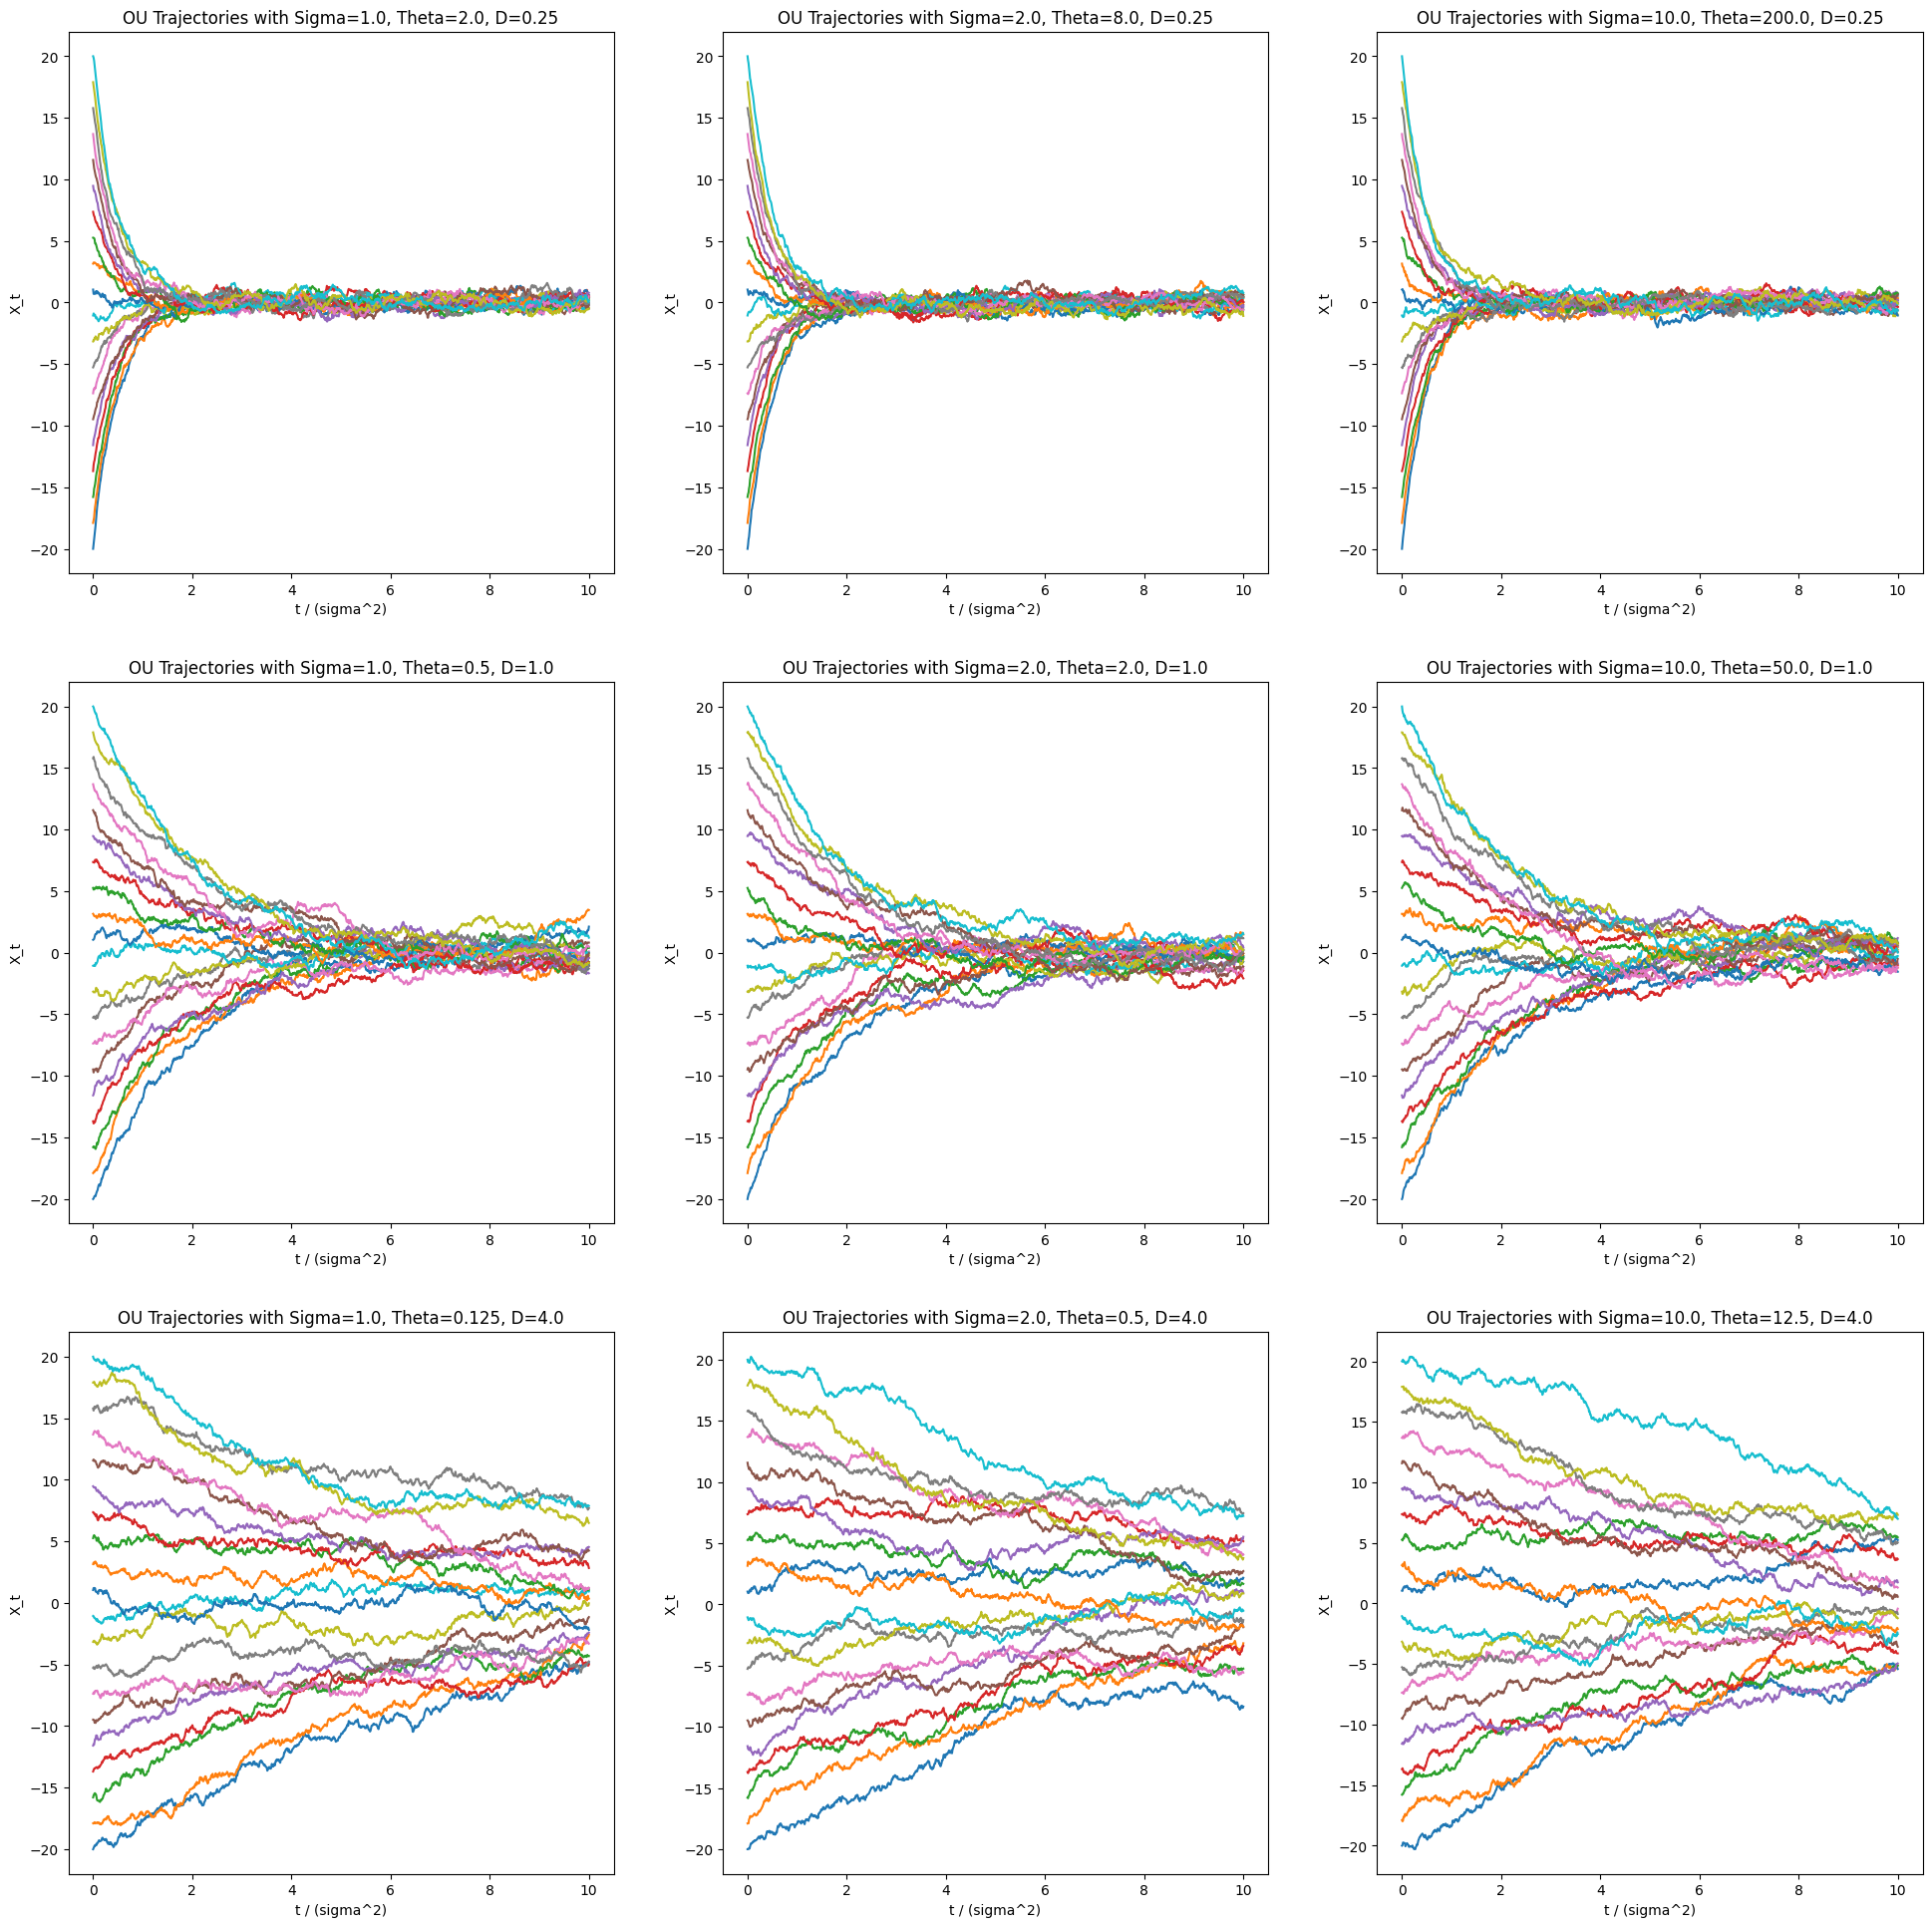

In [23]:
# Let's try rescaling with time
sigmas = [1.0, 2.0, 10.0]
ds = [0.25, 1.0, 4.0] # sigma**2 / 2t
simulation_time = 10.0

fig, axes = plt.subplots(len(ds), len(sigmas), figsize=(8 * len(sigmas), 8 * len(ds)))
axes = axes.reshape((len(ds), len(sigmas)))
for d_idx, d in enumerate(ds):
    for s_idx, sigma in enumerate(sigmas):
        theta = sigma**2 / 2 / d
        ou_process = OUProcess(theta, sigma)
        simulator = EulerMaruyamaSimulator(sde=ou_process)
        x0 = torch.linspace(-20.0,20.0,20).view(-1,1).to(device)
        time_scale = sigma**2
        ts = torch.linspace(0.0,simulation_time / time_scale,1000).to(device) # simulation timesteps
        ax = axes[d_idx, s_idx]
        plot_scaled_trajectories_1d(x0=x0, simulator=simulator, timesteps=ts, time_scale=time_scale, label=f'Sigma = {sigma}', ax=ax)
        ax.set_title(f'OU Trajectories with Sigma={sigma}, Theta={theta}, D={d}')
        ax.set_xlabel(f't / (sigma^2)')
        ax.set_ylabel('X_t')
plt.show()